# Scatterplot (ggplot2)

In [8]:
set.seed(955)
# Make some noisily increasing data
dat <- data.frame(cond = rep(c("A", "B"), each=10),
                  xvar = 1:20 + rnorm(20,sd=3),
                  yvar = 1:20 + rnorm(20,sd=3))
head(dat)
#>   cond      xvar         yvar
#> 1    A -4.252354  3.473157275
#> 2    A  1.702318  0.005939612
#> 3    A  4.323054 -0.094252427
#> 4    A  1.780628  2.072808278
#> 5    A 11.537348  1.215440358
#> 6    A  6.672130  3.608111411

library(ggplot2)
library(gridExtra)

,cond,xvar,yvar
1,A,-4.252354,3.473157
2,A,1.702318,0.005939612
3,A,4.323054,-0.09425243
4,A,1.780628,2.072808
5,A,11.53735,1.21544
6,A,6.67213,3.608111


### Basic scatterplots with regression lines

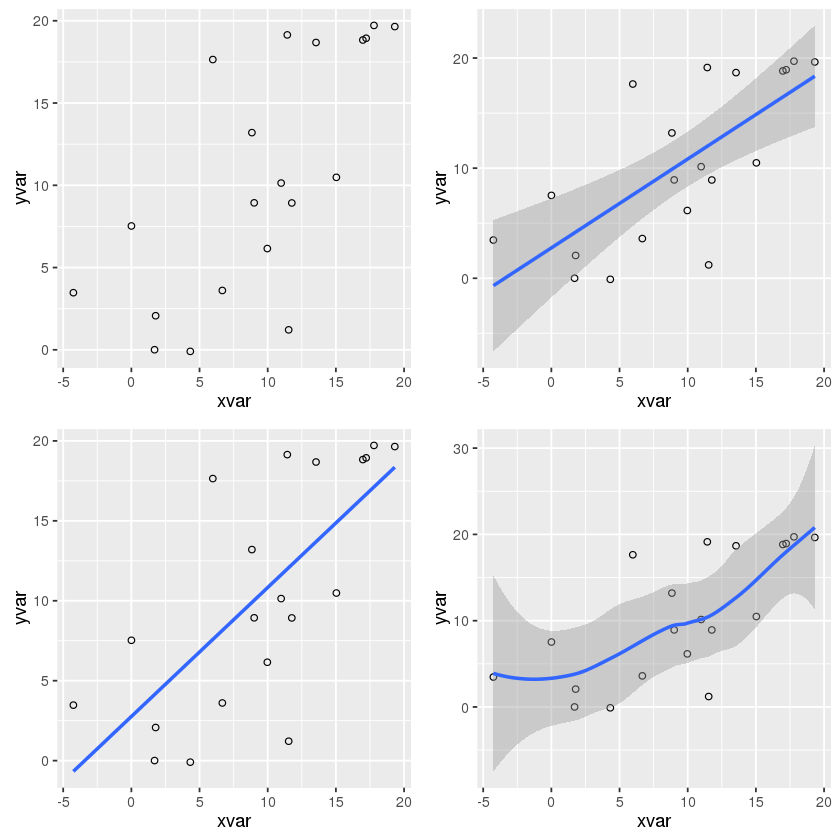

In [9]:
p1<-ggplot(dat, aes(x=xvar, y=yvar)) +
    geom_point(shape=1)      # Use hollow circles

p2<-ggplot(dat, aes(x=xvar, y=yvar)) +
    geom_point(shape=1) +    # Use hollow circles
    geom_smooth(method=lm)   # Add linear regression line 
                             #  (by default includes 95% confidence region)

p3<-ggplot(dat, aes(x=xvar, y=yvar)) +
    geom_point(shape=1) +    # Use hollow circles
    geom_smooth(method=lm,   # Add linear regression line
                se=FALSE)    # Don't add shaded confidence region


p4<-ggplot(dat, aes(x=xvar, y=yvar)) +
    geom_point(shape=1) +    # Use hollow circles
    geom_smooth()            # Add a loess smoothed fit curve with confidence region
#> geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
grid.arrange(p1, p2, p3, p4, nrow = 2, ncol =2, heights = c(0.65, 0.65))

### Set color/shape by another variable

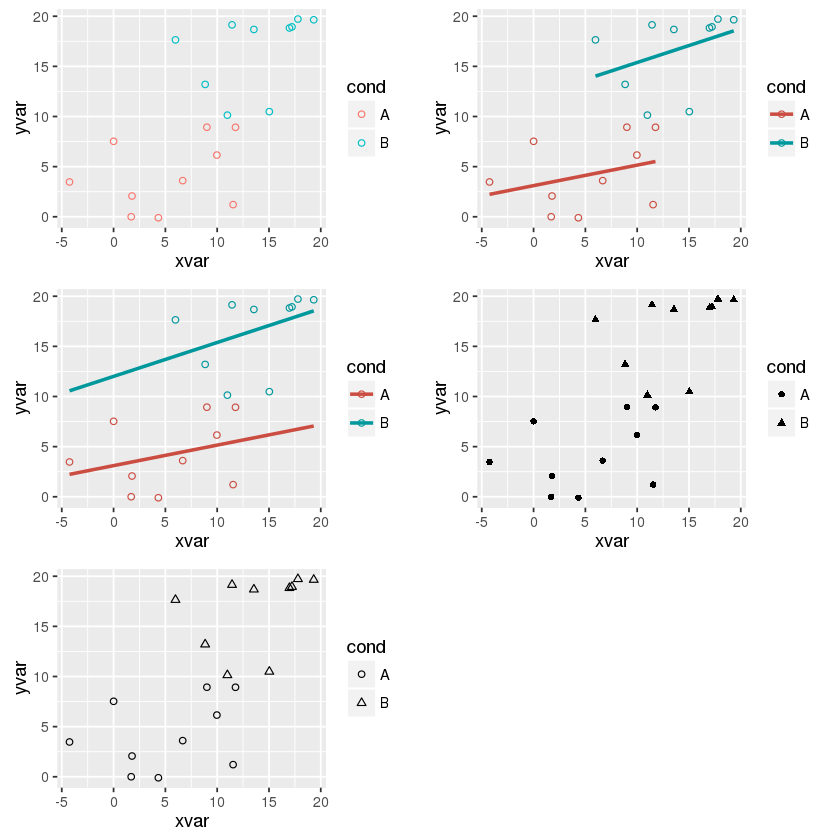

In [10]:
# Set color by cond
p5<-ggplot(dat, aes(x=xvar, y=yvar, color=cond)) + geom_point(shape=1)

# Same, but with different colors and add regression lines
p6<-ggplot(dat, aes(x=xvar, y=yvar, color=cond)) +
    geom_point(shape=1) +
    scale_colour_hue(l=50) + # Use a slightly darker palette than normal
    geom_smooth(method=lm,   # Add linear regression lines
                se=FALSE)    # Don't add shaded confidence region

# Extend the regression lines beyond the domain of the data
p7<-ggplot(dat, aes(x=xvar, y=yvar, color=cond)) + geom_point(shape=1) +
    scale_colour_hue(l=50) + # Use a slightly darker palette than normal
    geom_smooth(method=lm,   # Add linear regression lines
                se=FALSE,    # Don't add shaded confidence region
                fullrange=TRUE) # Extend regression lines


# Set shape by cond
p8<-ggplot(dat, aes(x=xvar, y=yvar, shape=cond)) + geom_point()

# Same, but with different shapes
p9<-ggplot(dat, aes(x=xvar, y=yvar, shape=cond)) + geom_point() +
    scale_shape_manual(values=c(1,2))  # Use a hollow circle and triangle
grid.arrange(p5, p6, p7, p8, p9, nrow = 3, ncol =2, heights = c(0.65, 0.65, 0.65))

### Handling overplotting

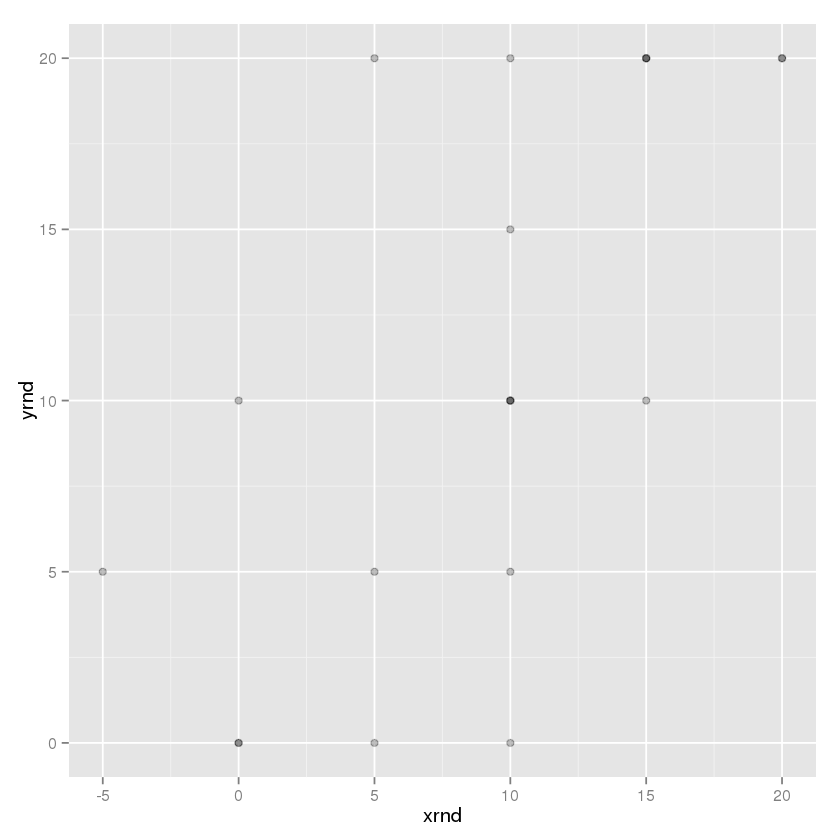

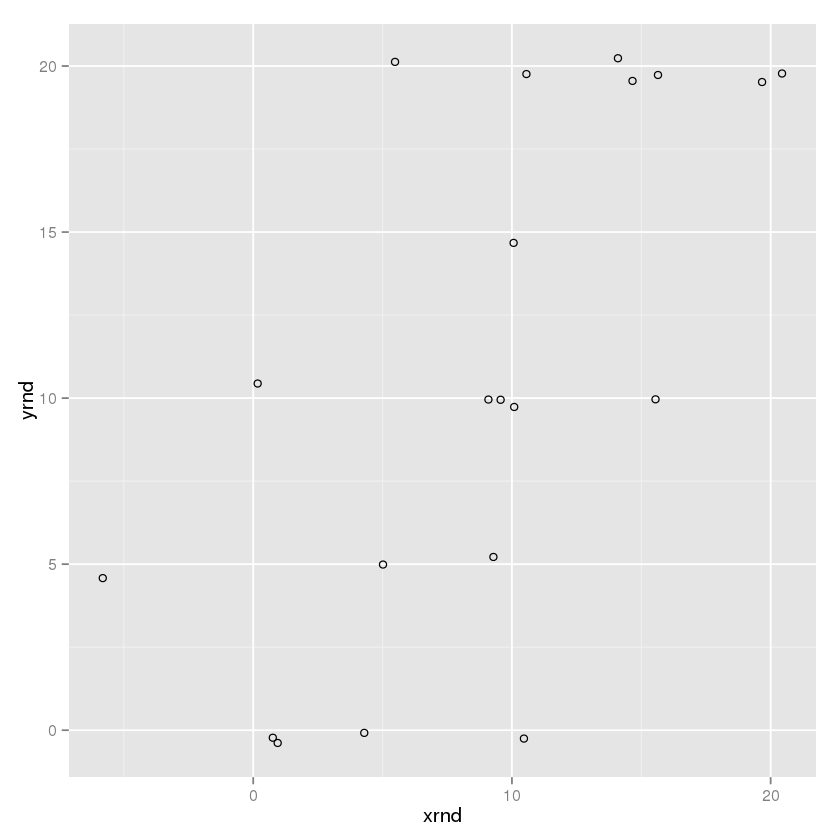

In [4]:
# Round xvar and yvar to the nearest 5
dat$xrnd <- round(dat$xvar/5)*5
dat$yrnd <- round(dat$yvar/5)*5

# Make each dot partially transparent, with 1/4 opacity
# For heavy overplotting, try using smaller values
ggplot(dat, aes(x=xrnd, y=yrnd)) +
    geom_point(shape=19,      # Use solid circles
               alpha=1/4)     # 1/4 opacity


# Jitter the points
# Jitter range is 1 on the x-axis, .5 on the y-axis
ggplot(dat, aes(x=xrnd, y=yrnd)) +
    geom_point(shape=1,      # Use hollow circles
               position=position_jitter(width=1,height=.5))